c:\Users\mathe\Desktop\TCC\pyleecan\pyleecan\pyleecan\Methods\Machine\Machine\plot.py:200: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot: title={'center': 'Toyota_Prius'}, xlabel='Position along x-axis [m]', ylabel='Position along y-axis [m]'>)

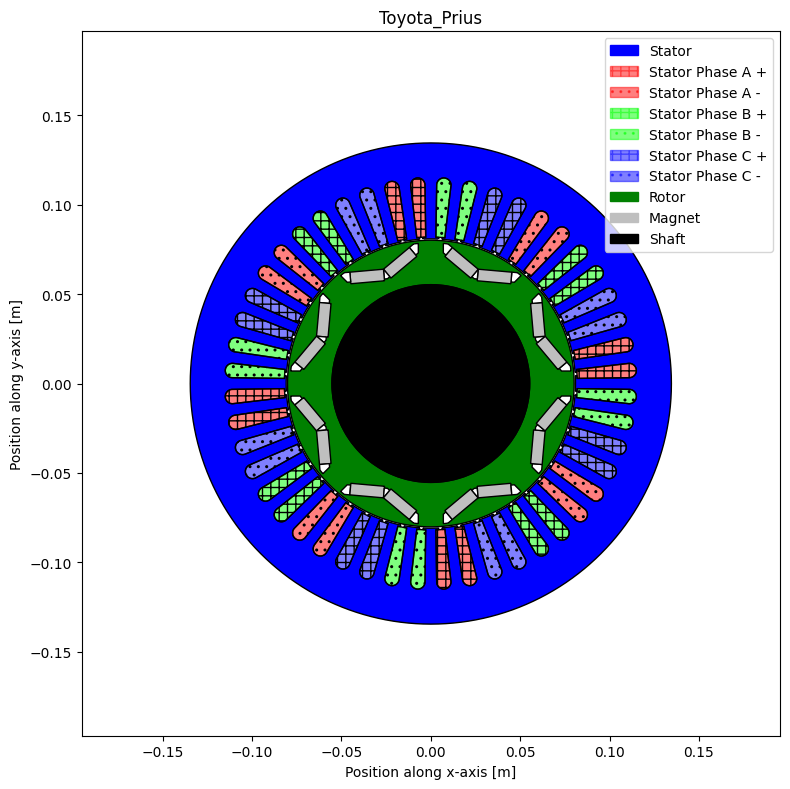

In [74]:
%matplotlib inline

from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.Electrical import Electrical
from pyleecan.Classes.EEC_PMSM import EEC_PMSM
from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Classes.ForceMT import ForceMT
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from numpy import sqrt, exp, pi

PMSM_machine = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
PMSM_machine.plot()

In [76]:
simu = Simu1(name="PMSM", machine=PMSM_machine)
p = simu.machine.stator.winding.p #numero de pares de polo
qs = simu.machine.stator.winding.qs #numero de fases

eec = EEC_PMSM(fluxlink=MagFEMM(is_periodicity_a=True, T_mag=60),)

simu.elec = Electrical(eec=eec)

simu.mag = MagFEMM(is_periodicity_a=True, is_periodicity_t=True, nb_worker=4)
simu.force = ForceMT(is_periodicity_a=True, is_periodicity_t=True)
simu.struct = None

simu.input = InputCurrent()

I0_rms = 200/sqrt(2)
Phi0 = 140*pi/180

simu.input.OP = OPdq(N0 = 2000)
simu.input.OP.set_I0_Phi0(I0_rms, Phi0)

simu.input.Nt_tot = 800
simu.input.Na_tot = 4096

simu_output = simu.run()

[16:08:09] Starting running simulation PMSM (machine=Toyota_Prius)
[16:08:10] Starting Electric module
[16:08:10] Starting running simulation PMSM_FluxLinkFEMM (machine=Toyota_Prius)
[16:08:10] Starting Magnetic module
[16:08:12] Solving time steps: 0%
[16:08:23] Solving time steps: 25%
[16:08:33] Solving time steps: 50%
[16:08:43] Solving time steps: 75%
[16:08:53] Solving time step: 100%
[16:08:53] End of simulation PMSM_FluxLinkFEMM
[16:08:53] Starting running simulation PMSM_FluxLinkFEMM_FluxLinkFEMM (machine=Toyota_Prius)
[16:08:53] Starting Magnetic module
[16:08:54] Solving time steps: 0%
[16:09:07] Solving time steps: 25%
[16:09:18] Solving time steps: 50%
[16:09:31] Solving time steps: 75%
[16:09:45] Solving time step: 100%
[16:09:45] End of simulation PMSM_FluxLinkFEMM_FluxLinkFEMM
[16:09:45] Starting Magnetic module
[16:09:47] Solving time steps: 0%
[16:09:48] Solving time steps: 0%
[16:09:48] Solving time steps: 0%
[16:09:49] Solving time steps: 0%
[16:10:02] Solving time s

In [77]:
print(f'Id: {simu.input.OP.Id_ref:.3f} / Iq: {simu.input.OP.Iq_ref:.3f}')
print(f'Ud: {simu_output.elec.OP.Ud_ref:.3f} / Uq: {simu_output.elec.OP.Uq_ref:.3f}')
print(f'Ld: {simu_output.elec.eec.Ld:.6f} / Lq: {simu_output.elec.eec.Lq:.6f}')
print(f'R1: {simu_output.elec.eec.R1:.4f}')
print(f'Torque eletromagnetico: {simu_output.elec.Tem_av:.3f}')
print(f'Densidade de corrente (valor RMS A/m²): {simu_output.elec.get_Jrms():.3f}')
print(f'Torque síncrono [N.m]: {simu_output.elec.eec.comp_torque_sync_rel()[0]:.3f}')
print(f'Torque relutante [N.m]: {simu_output.elec.eec.comp_torque_sync_rel()[1]:.3f}')



Id: -108.335 / Iq: 90.904
Ud: -190.478 / Uq: 10.408
Ld: 0.001246 / Lq: 0.002424
R1: 0.0547
Torque eletromagnetico: 293.475
Densidade de corrente (valor RMS A/m²): 16652984.871
Torque síncrono [N.m]: 154.289
Torque relutante [N.m]: 139.186


c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:539: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


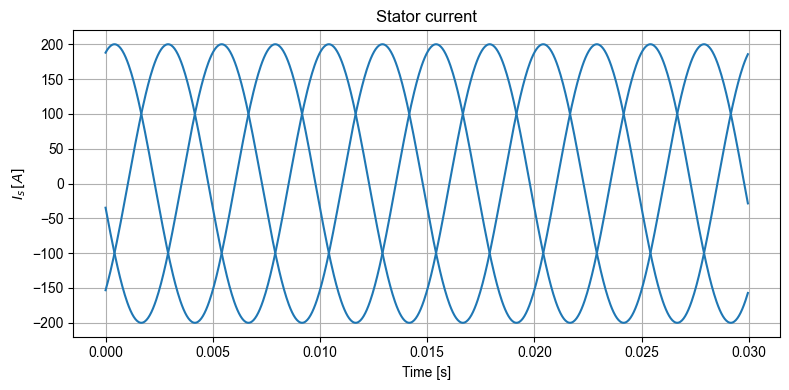

In [78]:
simu_output.elec.get_Is().plot_2D_Data("time", "phase")

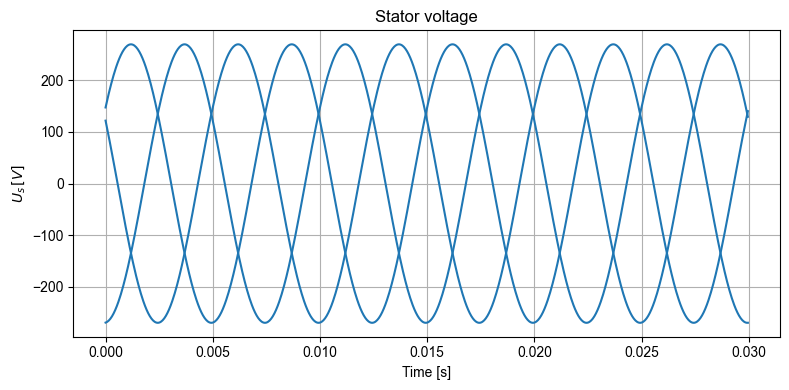

In [79]:
simu_output.elec.get_Us().plot_2D_Data("time", "phase")

c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\SciDataTool\Functions\Plot\plot_3D.py:405: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)


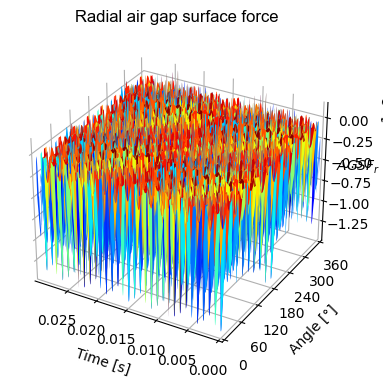

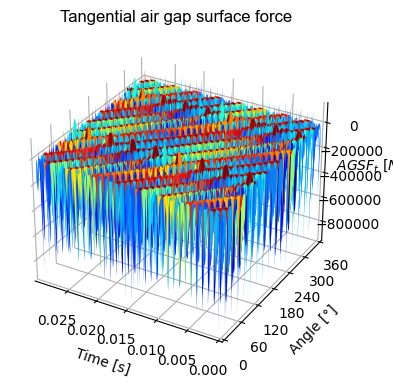

In [83]:
simu_output.force.AGSF.plot_3D_Data("time", "angle{°}", is_2D_view=False)

In [92]:
print(simu_output.mag.Tem)

parent = None 
symbol = "T_{em}"
name = "Electromagnetic torque"
unit = "Nm"
normalizations[ref] =parent = <class 'SciDataTool.Classes.DataTime.DataTime'> object
	unit = "SI"
	ref = 0.001
	


axes = [<SciDataTool.Classes.DataLinspace.DataLinspace object at 0x000001A833CBB730>]

FTparameters = {}
values = 
[326.69119983 314.91392368 301.58792762 288.74401389 278.88973958
 273.60080283 272.09218932 273.03617353 275.82742557 280.51953019
 288.43228499 298.35658648 307.15543727 313.4274543  316.89404863
 317.27381747 313.41004034 305.44753592 294.93481431 284.38026188
 275.98426734 271.73255021 271.59246485 274.34846373 278.70099047
 284.7081787  292.60169398 303.30395852 315.71107932 326.4471336
 333.88563829 337.80582795 337.00488543 330.67930717 319.86574629
 306.57444917 293.01809054 281.6949321  274.96203985 272.53894205
 272.86013997 274.94663911 278.71885293 285.2487306  294.65890916
 304.25029015 311.61720965 316.32735392 318.02507037 315.39410213
 308.57421048 298.62279543 287.761

In [72]:
#simu_output.elec.eec.comp_torque_sync_rel()
EEC_PMSM.comp_torque_sync_rel(simu_output.elec.eec)[1]

139.18586120648212